## Human Breast Cancer
**Date** : 2021-10-05<br>
**Author** : Alma Andersson<br>
**Description** : This notebook outlines the analysis related to the human breast cancer data.

In [81]:
%load_ext autoreload
%autoreload 2

import os.path as osp
import matplotlib.pyplot as plt
import anndata as ad
import eggplant as eg
import pandas as pd
import scanpy as sc
import numpy as np
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
SAVE_MODE = False

In [83]:
CNT_PTH = "../data/human-breast-cancer/curated/bcA.h5ad"
RES_DIR = "../../res/analysis/human-breast-cancer/"

In [84]:
adatas = ad.read_h5ad(CNT_PTH)
adatas = {"bcA":adatas}

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


inspect anndata object

In [85]:
for a in adatas.values():
    sc.pp.filter_cells(a,min_counts=100)
    eg.pp.default_normalization(a,min_cells=0.1)
    print(a)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 3798 × 11993
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mean', 'std'
    uns: 'curated_landmarks', 'spatial', 'log1p'
    obsm: 'spatial'


create reference from `bcA` sample

In [86]:
ref_fa = eg.m.Reference(adatas["bcA"].obsm["spatial"],
                    landmarks = adatas["bcA"].uns["curated_landmarks"],
                    )

match scales and get landmarks distances in sample bcA and bcB

In [87]:
eg.pp.match_scales(adatas["bcA"],ref_fa)
eg.pp.get_landmark_distance(adatas["bcA"])


In [88]:
ref_ex = copy.deepcopy(ref_ex)

Visualize cell types

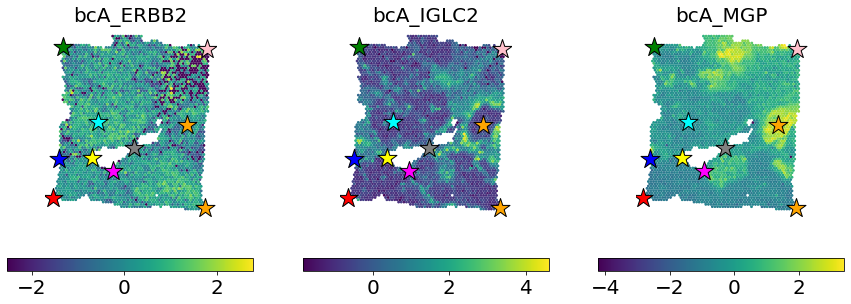

In [89]:
GENES = ["ERBB2","IGLC2","MGP"]

fig,ax = eg.pl.visualize_observed(adatas,
                         features = GENES,
                         n_cols = 3,
                         n_rows = 2,
                         flip_y = True,
                         include_title = True,
                         fontsize = 20,
                         marker_size =3,
                         share_colorscale = False,
                         separate_colorbar = False,
                         side_size = 5,
                         landmark_marker_size = 400,
                         show_landmarks = True,
                         colorbar_fontsize = 20,
                         return_figures = True,
                        )
if SAVE_MODE: fig.savefig(osp.join(RES_DIR,"human-breast-cancer-observed.png"),
                         bbox_inches ="tight")

transfer data from `bcB` to reference (`bcA`)

In [91]:
help(eg.fun.fa_transfer_to_reference)

Help on function fa_transfer_to_reference in module eggplant.methods:

fa_transfer_to_reference(adatas: Union[anndata._core.anndata.AnnData, List[anndata._core.anndata.AnnData], Dict[str, anndata._core.anndata.AnnData]], reference: eggplant.models.Reference, variance_threshold: float = 0.3, n_components: Union[int, NoneType] = None, use_highly_variable: bool = True, layer: Union[str, NoneType] = None, device: Literal['cpu', 'gpu'] = 'cpu', n_epochs: int = 1000, learning_rate: float = 0.01, subsample: Union[float, int, NoneType] = None, verbose: bool = False, return_models: bool = False, return_losses: bool = True, max_cg_iterations: int = 1000, meta_key: str = 'meta', **kwargs) -> Dict[str, Union[List[ForwardRef('m.GPModel')], List[numpy.ndarray]]]
    fast approximate transfer of observed data to a reference
    
    similar to :paramref:`~eggplant.methods.transfer_to_reference`, but designed
    for *fast approximate* transfer of the full set of features. To speed up the
    transfer

In [92]:
np.random.seed(1337)
losses = eg.fun.fa_transfer_to_reference(adatas,
                                         ref_fa,
                                         n_components=25,
                                         n_epochs=1000,
                                         device ="gpu",
                                         verbose = True,
                                         use_highly_variable = False,
                                         return_losses = True,
                                         return_models =False,
                                         max_cg_iterations = 10000,
                                        )

[Processing] ::  Model : bcA | Feature : 0_0 | Transfer : 1/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:01<00:00,  2.08it/s]


[Processing] ::  Model : bcA | Feature : 0_1 | Transfer : 2/25


/home/alma/miniconda3/envs/eggplant/lib/python3.8/site-packages/anndata-0.7.6-py3.8.egg/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:18<00:00,  2.28it/s]


[Processing] ::  Model : bcA | Feature : 0_2 | Transfer : 3/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:19<00:00,  2.28it/s]


[Processing] ::  Model : bcA | Feature : 0_3 | Transfer : 4/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:19<00:00,  2.28it/s]


[Processing] ::  Model : bcA | Feature : 0_4 | Transfer : 5/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:31<00:00,  2.22it/s]


[Processing] ::  Model : bcA | Feature : 0_5 | Transfer : 6/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:15<00:00,  2.02it/s]


[Processing] ::  Model : bcA | Feature : 0_6 | Transfer : 7/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:37<00:00,  2.18it/s]


[Processing] ::  Model : bcA | Feature : 0_7 | Transfer : 8/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:32<00:00,  2.21it/s]


[Processing] ::  Model : bcA | Feature : 0_8 | Transfer : 9/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:01<00:00,  2.37it/s]


[Processing] ::  Model : bcA | Feature : 0_9 | Transfer : 10/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:56<00:00,  2.40it/s]


[Processing] ::  Model : bcA | Feature : 0_10 | Transfer : 11/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:58<00:00,  2.09it/s]


[Processing] ::  Model : bcA | Feature : 0_11 | Transfer : 12/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:46<00:00,  2.15it/s]


[Processing] ::  Model : bcA | Feature : 0_12 | Transfer : 13/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:45<00:00,  2.15it/s]


[Processing] ::  Model : bcA | Feature : 0_13 | Transfer : 14/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:46<00:00,  2.14it/s]


[Processing] ::  Model : bcA | Feature : 0_14 | Transfer : 15/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:12<00:00,  2.31it/s]


[Processing] ::  Model : bcA | Feature : 0_15 | Transfer : 16/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:11<00:00,  2.32it/s]


[Processing] ::  Model : bcA | Feature : 0_16 | Transfer : 17/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:33<00:00,  2.20it/s]


[Processing] ::  Model : bcA | Feature : 0_17 | Transfer : 18/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:59<00:00,  2.09it/s]


[Processing] ::  Model : bcA | Feature : 0_18 | Transfer : 19/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:33<00:00,  2.21it/s]


[Processing] ::  Model : bcA | Feature : 0_19 | Transfer : 20/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:10<00:00,  2.32it/s]


[Processing] ::  Model : bcA | Feature : 0_20 | Transfer : 21/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:09<00:00,  2.33it/s]


[Processing] ::  Model : bcA | Feature : 0_21 | Transfer : 22/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:09<00:00,  2.33it/s]


[Processing] ::  Model : bcA | Feature : 0_22 | Transfer : 23/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:07<00:00,  2.34it/s]


[Processing] ::  Model : bcA | Feature : 0_23 | Transfer : 24/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:08<00:00,  2.33it/s]


[Processing] ::  Model : bcA | Feature : 0_24 | Transfer : 25/25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:07<00:00,  2.34it/s]
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [94]:
np.random.seed(1337)
losses = eg.fun.transfer_to_reference(adatas,
                                      features = GENES,
                                      reference = ref_ex,
                                      n_epochs=1000,
                                      device ="gpu",
                                      verbose = True,
                                      return_losses = True,
                                      return_models =False,
                                      max_cg_iterations = 10000,
                                     )

[Processing] ::  Model : bcA | Feature : ERBB2 | Transfer : 1/3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:18<00:00,  2.28it/s]


[Processing] ::  Model : bcA | Feature : IGLC2 | Transfer : 2/3


/home/alma/miniconda3/envs/eggplant/lib/python3.8/site-packages/anndata-0.7.6-py3.8.egg/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:31<00:00,  2.22it/s]


[Processing] ::  Model : bcA | Feature : MGP | Transfer : 3/3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:29<00:00,  2.23it/s]


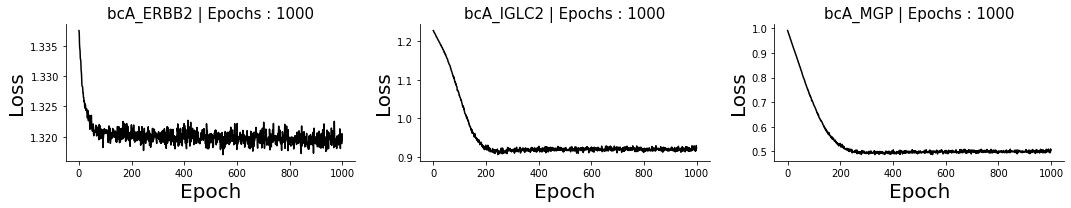

In [95]:
eg.pl.model_diagnostics(losses = losses)

inspect results

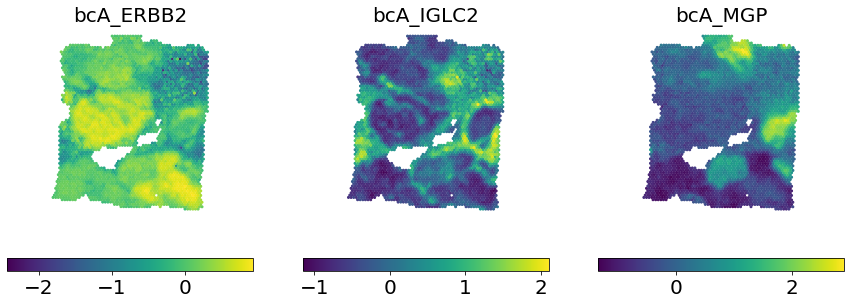

In [93]:
fig,ax = eg.pl.visualize_transfer(ref_fa,
                                  attributes=GENES,
                                  n_cols = 3,
                                  side_size = 5,
                                  flip_y = True,
                                  quantile_scaling = False,
                                  show_landmarks = False,
                                  marker_size = 4,
                                  include_colorbar = True,
                                  separate_colorbar = False,
                                  share_colorscale = False,
                                  fontsize = 20,
                                  colorbar_fontsize = 20,
                                  hspace = 0.4,
                                  return_figures = True,
                                 )

if SAVE_MODE: fig.savefig(osp.join(RES_DIR,"human-breast-cancer-trans.png"),
                         bbox_inches = "tight",
                         )

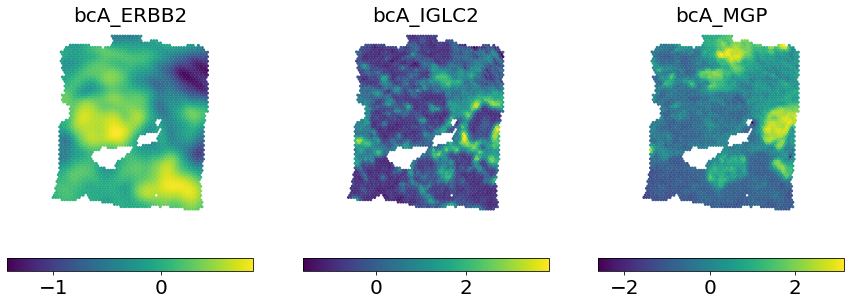

In [96]:
fig,ax = eg.pl.visualize_transfer(ref_ex,
                                  attributes=GENES,
                                  n_cols = 3,
                                  side_size = 5,
                                  flip_y = True,
                                  quantile_scaling = False,
                                  show_landmarks = False,
                                  marker_size = 4,
                                  include_colorbar = True,
                                  separate_colorbar = False,
                                  share_colorscale = False,
                                  fontsize = 20,
                                  colorbar_fontsize = 20,
                                  hspace = 0.4,
                                  return_figures = True,
                                 )

if SAVE_MODE: fig.savefig(osp.join(RES_DIR,"human-breast-cancer-trans.png"),
                         bbox_inches = "tight",
                         )

assess correlation with real values

In [99]:
ref_ex.adata.var

,model,feature
bcA_ERBB2,bcA,ERBB2
bcA_IGLC2,bcA,IGLC2
bcA_MGP,bcA,MGP


In [111]:
from scipy.stats import pearsonr
import pandas as pd

In [112]:
data = adatas["bcA"]
res = dict()
for gene in GENES:
    ori_x = data.obs_vector(gene)
    ex_x = ref_ex.adata.obs_vector("bcA_" + gene)
    fa_x = ref_fa.adata.obs_vector("bcA_" + gene)
    res[gene] = dict(ex = np.mean((ex_x - ori_x)**2),fa = np.mean((fa_x - ori_x)**2))


In [114]:
pd.DataFrame(res).T

,ex,fa
ERBB2,0.746404,0.706370
IGLC2,0.080998,0.395640
MGP,0.031744,0.216487
